In [ ]:
library(IRdisplay)
IRdisplay::display_html('<style>th, td { font-size: 25px }</style>')

# Quick Review

## - The occurance of random events can be discribed by the probability density function of the associated distribution.
## - Each unique distribution can be characterized by the moments of that distribution.
## - We can use the propoerties of a given distribution to determine the probability that a given value was sampled from that distribution (p-value)

# Estimation of the properties of a statistical distribution
## As scientists we often want to measure the effect of some treatment or protocol (i.e. What is the yield of plants given treatment A?)


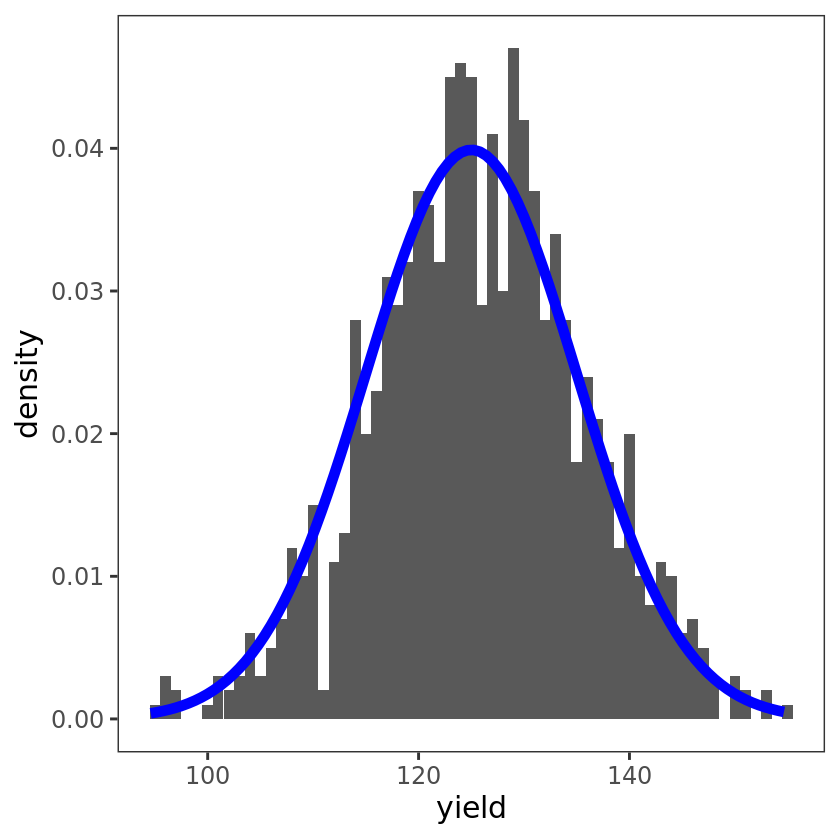

In [ ]:
library(ggplot2)
set.seed(5235)
ggplot(data.frame(x=rnorm(1000,125,10)), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=1 ) + xlab("yield") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank()) +
  stat_function(fun = dnorm,
        args = list(mean = 125,
                    sd = 10),
        colour = 'blue', size = 3)

## Often with the intent to compare the effects of treatments to determine if there is a significant difference

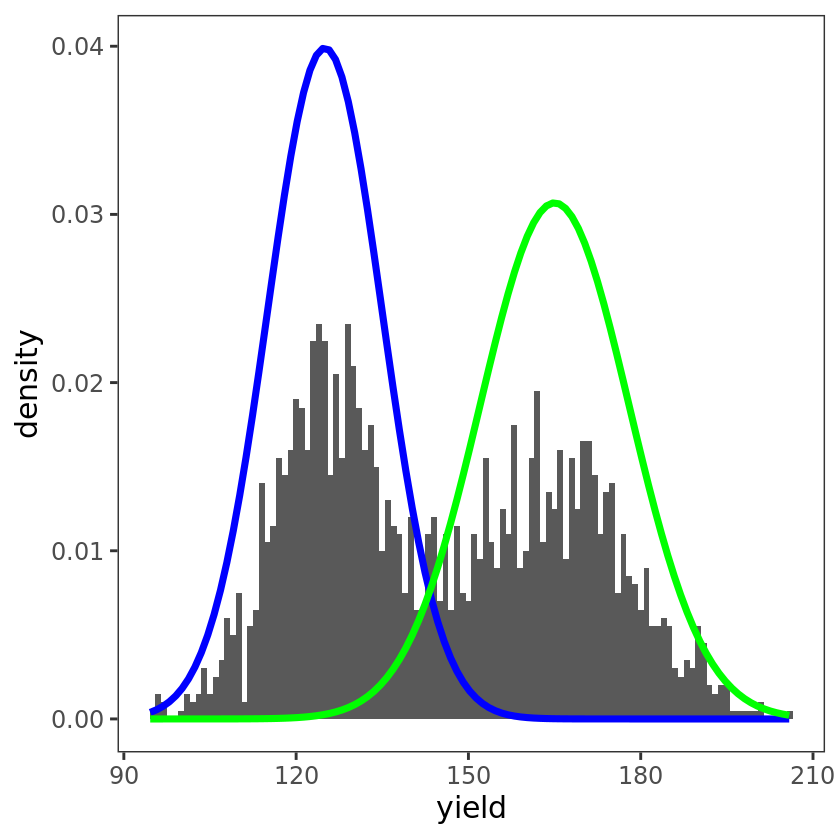

In [ ]:
library(ggplot2)
set.seed(5234)
ggplot(data.frame(x=c(rnorm(1000,125,10),rnorm(1000,165,13))), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=1 ) + xlab("yield") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank()) +
  stat_function(fun = dnorm,
        args = list(mean = 125,
                    sd = 10),
        colour = 'blue', size = 2) +
  stat_function(fun = dnorm,
        args = list(mean = 165,
                    sd = 13),
        colour = 'green', size = 2)


## To do this we generally take the following steps:
### 1) Design and experiment to minimize error and confounding in the estimation of effects
### 2) Fit an appropriate model (usually a linear model) that gives us the most precise and unbiased estimate of the effect.
### 3) Perform statistical tests on hypotheses as appropriate - functions of random variables are also random variables


# What is a linear Model?

## linear $\beta = Py$  

## non-linear $\beta = P^y$  

__________

# In today's class we are going to take the above example and fit a simple linear model

## But first there is some background that we need to cover.

# Expectation of Random Variables
![image.png](attachment:9c1b6ae6-d341-4df2-96ef-2053b293ebf8.png)
___

# Moments
![image.png](attachment:58686da3-e217-4280-bc71-3185784add4e.png)
  
  
____

# Now we will look at a trivial example
## We are interested in estimating $\mu$ for the random variable $x$
## We know that $\mu$ is equal to E[$x$]
## Given
|    x value          |       probability       |
|---------------------|-------------------------|
|        1            |           .2            |
|        2            |           .25           |
|        3            |           .35           |
|        4            |           .15           |
|        5            |           .05           |
## Calculate E[$x$]


In [ ]:
# your code here

# Now let's estimate the mean of $x%$ from a random sample drawn from the discrete distribution defined in the table above

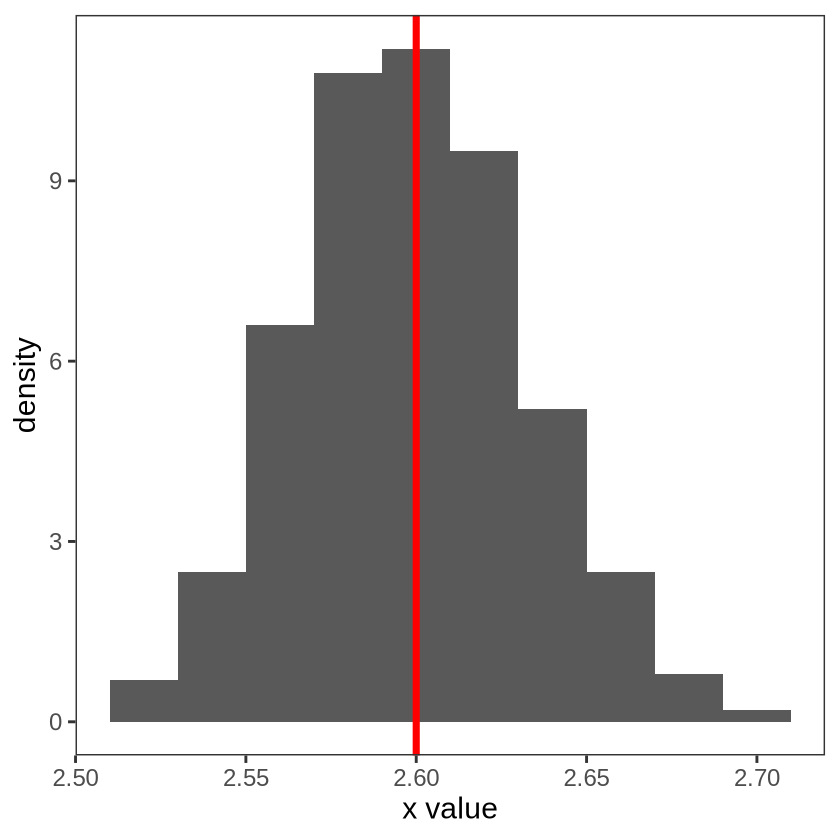

In [ ]:
library(ggplot2)
# sample size for x
samp_size=1000

# number of independent sampling events
# we will conduct multiple sampling events to look at the distribution of the mean of x
num_samps=500

# allocate a vector to store each sample from x
sample_means=rep(0,num_samps)

# a for loop for the number of samples
for(i in c(1:num_samps)){
    # a loop to draw each sample for each sampling event
    for(j in c(1:samp_size)){
        # generate a sample from a uniform random number and assigned a value to x based on the probability of obeserving x
        p=runif(1,0,1)
        if(p<.2){sample_means[i]=sample_means[i]+1/samp_size}
        if(p>=.2&&p<.45){sample_means[i]=sample_means[i]+2/samp_size}
        if(p>=.45&&p<.8){sample_means[i]=sample_means[i]+3/samp_size}
        if(p>=.8&&p<.95){sample_means[i]=sample_means[i]+4/samp_size}
        if(p>=.95){sample_means[i]=sample_means[i]+5/samp_size}

    } # end for loop to draw each sample for each sampling event
} # end for loop for the number of samples


# plotting the histogram of the means with a red vertical line indicating E[x]

ggplot(data.frame(x=sample_means), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=.02 ) + xlab("x value") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank()) +
  geom_vline(xintercept=(1*.2+2*.25+3*.35+4*.15+5*.05), size=2, color="red")


## Increase the sample size.
## How does it affect the distribution of the sample means?
_____

# Now let's move on to an example using a continuous variable following a **normal distribution**
## In practice we never have the complete data needed to calculate the true value of $\mu$, so we have to estimate $\mu$ from a sample of the random variable.
## But we don't want just any estimate, we want the **Best Linear Unbiased Estimate (BLUE)**
## - Best -> Minimum error variance of all possible linear estimates
## - Linear -> as define previoulsy
## - Unbiased -> E[$estimate$] = E[$x$]

## We will cover (to some extent) the derivation BLUE using Ordinary Least-Squares and Maximum Likelihood later but for now:
## Given that the BLUE for $\mu_x$ is $\frac{\sum_{i=1}^{n} x_i}{n}$
## Let's run some code to take a sample from the distribution of $x$ to compare $\overline{x}$ to $\mu_x$
## For this example we will draw samples from a normal distribution with $\mu=2.6$ and $\sigma^2= 1.24$

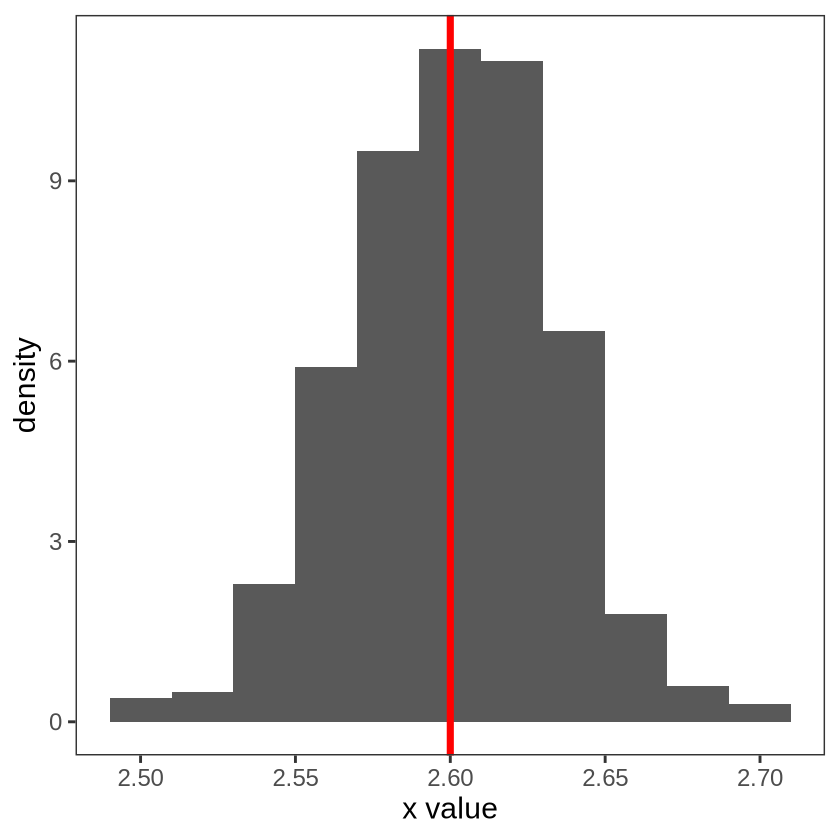

In [ ]:
library(ggplot2)
# sample size for x
samp_size=1000

# number of independent sampling events
# we will conduct multiple sampling events to look at the distribution of the mean of x
num_samps=500

# allocate a vector to store each sample from x
sample_means=rep(0,num_samps)

# a for loop for the number of samples
for(i in c(1:num_samps)){

    # generate a sample from a normal distribution
    #rnorm(sample size,mean,standard deviation)
    samp=rnorm(samp_size,2.6,1.24**.5)
    sample_means[i]=mean(samp)

} # end for loop for the number of samples


# plotting the histogram of the means with a red vertical line indicating E[x]

ggplot(data.frame(x=sample_means), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=.02 ) + xlab("x value") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank()) +
  geom_vline(xintercept=(1*.2+2*.25+3*.35+4*.15+5*.05), size=2, color="red")



# Modify the sample size in the code above and note how the distribution of sample means changes.
## What distribution does the sample mean follow?
## How does the sample size impact the distribution of the sample means?
## Is this estimate of $\mu_x$ unbiased?

# Proof
## to prove this estimate is unbiased we have to show that E[$\overline{x}$] = E[x]
## To do this we need to know some basic properties of expectations:
![image.png](attachment:1d8349fb-e6c6-4296-b436-63356f14ae4a.png)

## To make this easy on me, I'm going to work it out on the board
## You do not need to know how to do this for any class assignments.


# To prove the estimate is "Best" (minimum error variance of all possible linear estimates) it is easier to use matrix notation.
___________________________
# But first let's talk about **Variance** an **Covariance**.


## The variance of x is the second moment of the distribution of x and is represented as:
## V($x$) = E[$(x-\mu_x)^2$]
## Again, using the simple discrete distribution defined in the table below it is easy to calculate  E[$(x-\mu_x)^2$]

## As with the mean, it is easy to calculate E[$(x-\mu_x)^2$] using the true value for $\mu_x$ and the probabilities of obsevering each value of $x$ provided n the table below.
     
|    x value          |       probability       |
|---------------------|-------------------------|
|        1            |           .2            |
|        2            |           .25           |
|        3            |           .35           |
|        4            |           .15           |
|        5            |           .05           |



## Use the probabilities in this table to calculate the variance of $x$ ($\sigma^2$)

In [ ]:
# your code here

## Use the following estimator to estimate the sample variance for x
## $\frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{(n-1)}$

[1] 1.24


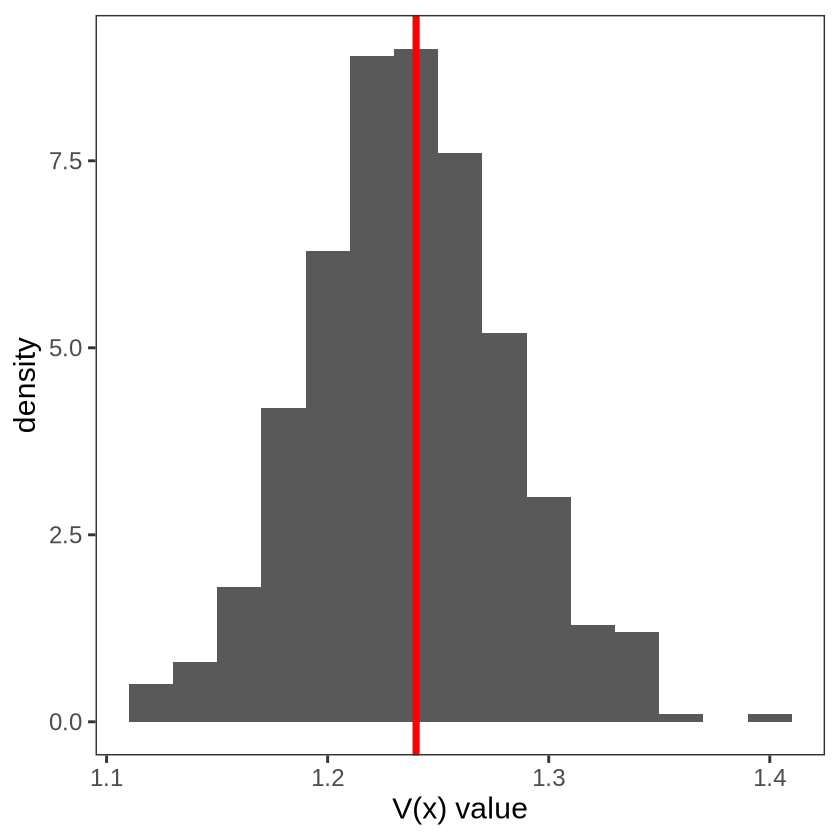

In [ ]:
library(ggplot2)
#### sample size for x
samp_size=1000

# number of independent sampling events
# we will conduct multiple sampling events to look at the distribution of the mean of x
num_samps=500

# allocate a vector to store each sample from x
sample_vars=rep(0,num_samps)

# a for loop for the number of samples
for(i in c(1:num_samps)){
    # allocating a vector to stroe the sampled values of x
    sampled_x=rep(0,samp_size)
    # a loop to draw each sample for each sampling event
    for(j in c(1:samp_size)){
        # generated a uniform random number and assigned a value to x based on the probability of obeserving x
        p=runif(1,0,1)
        if(p<.2){sampled_x[j]=1}
        if(p>=.2&&p<.45){sampled_x[j]=2}
        if(p>=.45&&p<.8){sampled_x[j]=3}
        if(p>=.8&&p<.95){sampled_x[j]=4}
        if(p>=.95){sampled_x[j]=5}

    } # end for loop to draw each sample for each sampling event

    # loop to calculate variance
    for(j in c(1:samp_size)){

        sample_vars[i]=sample_vars[i]+(sampled_x[j]-mean(sampled_x))**2/(samp_size - 1)

    } # end for loop to calculate variance

} # end for loop for the number of samples


# plotting the histogram of the means with a red vertical line indicating E[x]
mu_x=(1*.2+2*.25+3*.35+4*.15+5*.05)
var_x=(1-mu_x)**2*.2+(2-mu_x)**2*.25+(3-mu_x)**2*.35+(4-mu_x)**2*.15+(5-mu_x)**2*.05
print(var_x)
ggplot(data.frame(x=sample_vars), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=.02 ) + xlab("V(x) value") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank()) +
  geom_vline(xintercept=var_x, size=2, color="red")

## Change the sample size. How does this impact the distribution of sample variances?
## In your opinion is this a good estimate of the variance? Why?
__________

# Now moving back to a normally distributed variable.
## In scalar form the maximum liklihood estimator (MLE) for variance is:
## $\frac{\sum_{i=1}^{n} (x_i - \mu_x)^2}{n}$
## In practice we do not know $\mu_x$ so we replace $\mu_x$ with $\bar{x}$
## This leads to the restricted maximum likelihood estimator (REML):
## $\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{(n-1)}$
## We divde by $(n-1)$ because we lose a degree of freedom by estimating $\mu_x$ from the sample data.
## We can use Expectations to prove that this is the unbiased estimator, but I will spare you the mathematics unless there is interest in seeing it.
## This is why you should always use REML to solve for variance components (not covered in this class)

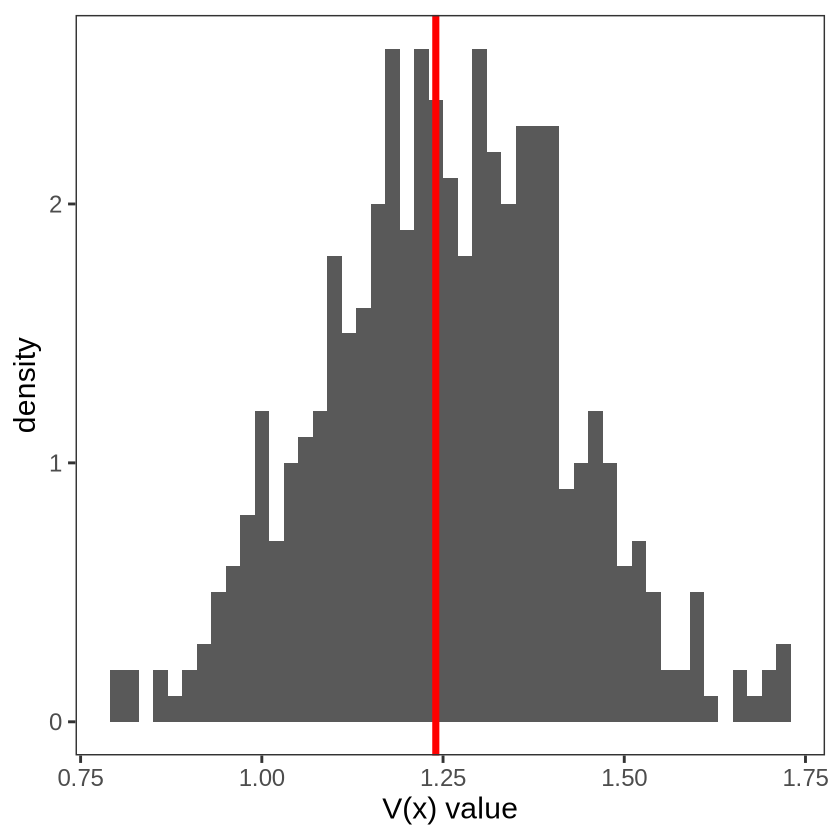

In [ ]:
library(ggplot2)
#### sample size for x
samp_size=100

# number of independent sampling events
# we will conduct multiple sampling events to look at the distribution of the mean of x
num_samps=500

# allocate a vector to store each sample from x
sample_vars=rep(0,num_samps)

# a for loop for the number of samples
for(i in c(1:num_samps)){

    # generate a sample from a normal distribution
    #rnorm(sample size,mean,standard deviation)
    sampled_x=rnorm(samp_size,2.6,1.24**.5)

    # loop to calculate variance
    for(j in c(1:samp_size)){

        sample_vars[i]=sample_vars[i]+(sampled_x[j]-mean(sampled_x))**2/(samp_size - 1)

    } # end for loop to calculate variance

} # end for loop for the number of samples


# plotting the histogram of the means with a red vertical line indicating E[x]

var_x=1.24

ggplot(data.frame(x=sample_vars), aes(x=x)) +
  geom_histogram(aes(y = ..density..), binwidth=.02 ) + xlab("V(x) value") +
  theme_bw(base_size=18) +
  theme(panel.background=element_blank(),
        panel.grid=element_blank()) +
  geom_vline(xintercept=var_x, size=2, color="red")

# Modify the sample size in the code above and note how the distribution of sample variance changes.
## Do you notice anything different about this ditribution as compared to the distribution of the sample mean?
## How does the sample size impact the distribution of the sample variance?
## Is this estimate of $\sigma_x^2$ unbiased?

# Covariance
## The covariance of 2 variables $x$ and $y$ describe how the two variables change relative to each other.
## A positive covariance means that as one variable increase the other variable tends to increase as well.

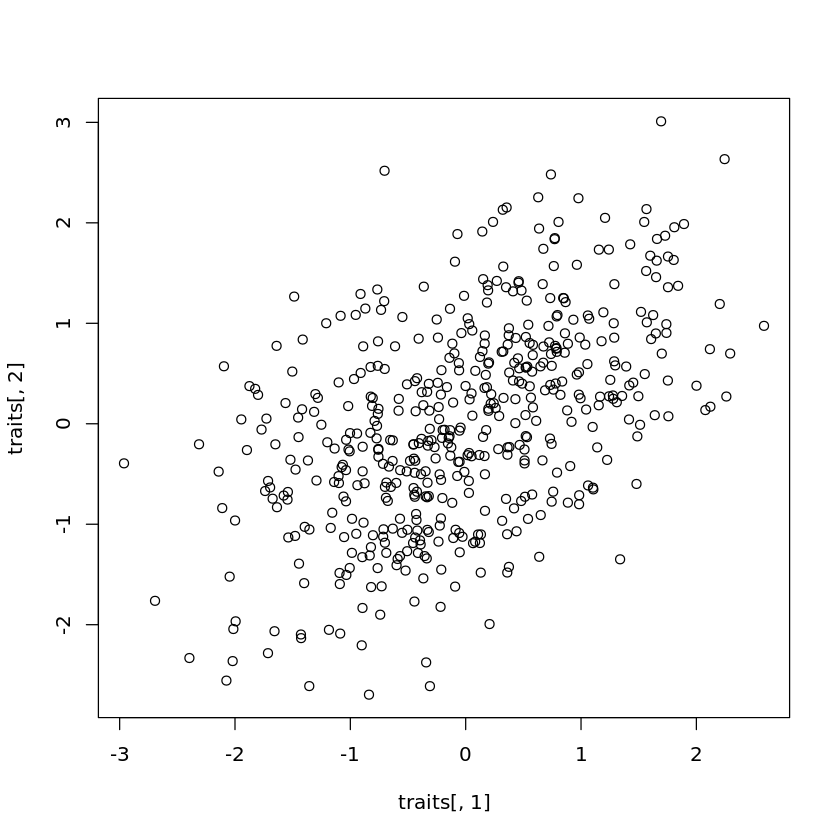

In [ ]:
library(MASS)
covariance = matrix(1,2,2)
covariance[1,2]=.5
covariance[2,1]=.5
traits=mvrnorm(500,c(0,0),covariance)
plot(traits[,1],traits[,2])


## A negative covariance means that as one variable increase the other variable tends to decrease.

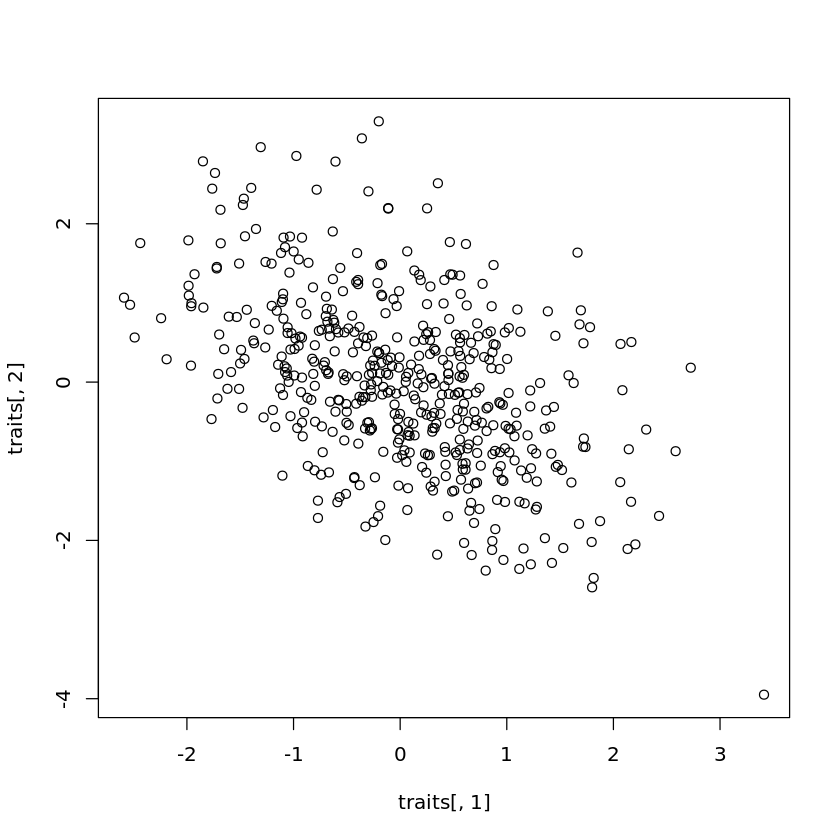

In [ ]:
library(MASS)
covariance = matrix(1,2,2)
covariance[1,2]=-.5
covariance[2,1]=-.5
traits=mvrnorm(500,c(0,0),covariance)
plot(traits[,1],traits[,2])

## Zero covariance means there is no linear relationship between the two variables.

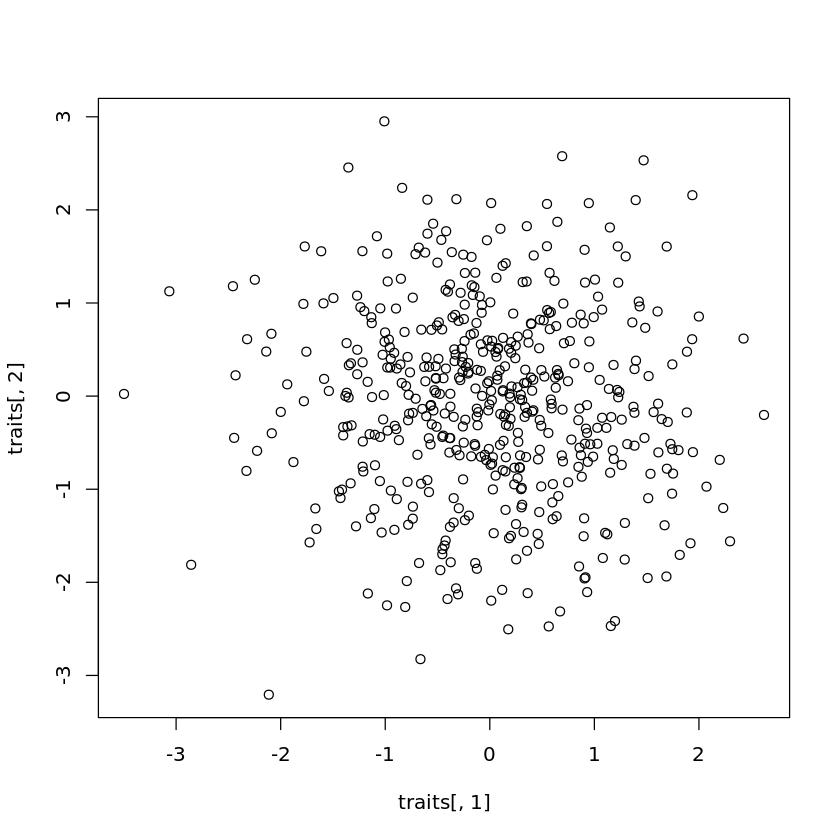

In [ ]:
library(MASS)
covariance = matrix(1,2,2)
covariance[1,2]=0
covariance[2,1]=0
traits=mvrnorm(500,c(0,0),covariance)
plot(traits[,1],traits[,2])

## The covariance between two variable $Cov(x,y)$ is:
## E[$a(x-\mu_x)b(y-\mu_y)$]
## The estimator for covariance (in scalar form) is:
## $\frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i-\overline{y})}{(n-1)}$

## Covariance tells us whether a linear relationship exist between but not the strength of the relationship
## To know the strength the variance of the two variables needs to be known.
## The correlation of two variables uses both the covariance and the variance to estimate the strength of a linear relationship:
## $r(x,y) = \frac{Cov(x,y)}{\sqrt{V(x)V(y)}}$

# Variance of f(x)

## Functions of random variables are also random variables and we can use expectations to calculate the expected variance f(x)
## I won't go through the proofs here in class but if anyone is interested I would be happy to show you in office hours
## Given $V(x) = \sigma^2_{x}$, $V(y) = \sigma^2_{y}$, and $a$ is a constant
## $V(ax) = a^2\sigma^2_{x}$
## $V(x+y) = \sigma^2_{x} + \sigma^2_{x} + 2\sigma_{xy}$
## $V(x-y) = \sigma^2_{x} + \sigma^2_{x} - 2\sigma_{xy}$

# **What is the variance of $\bar{x}$ ?**

# Regression Coefficient
## When there is a linear relationship between two variables the covariance can be used to predict one varible using the observed value of the correlated variable
## $\hat{y_i}=\bar{y}+b_{y|x}(x_i-\bar{x})$
## When y and x are centered (i.e. $\bar{y}=0$ and $\bar{x}=0$) the previous equation reduces to:
## $\hat{y_i}=b_{y|x}(x_i)$

## The BLUE for the regression coefficient is
## $\frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$
## Again, when $x$ and $y$ are centered the above equation reduces to:
## $\frac{\sum_{i=1}^{n} x_iy_i}{\sum_{i=1}^{n} x_i^2}$
_____

# Matrix Notation
## We have introduced some estimators of the first and second moments of the normal distribution and shown (at least empirically) that these estimates are unbiased.
## Now let's look at these same estimators in matrix notation.

## When we multiply a row vector by a column vector the result is the sum of the product of the corresponding elements of the vectors
## Multiplication of a row and column vector:
## $$\begin{bmatrix}x_{1} & x_{2} & x_{3}\end{bmatrix} * \begin{bmatrix}y_{1}\\ y_{2}\\ y_{3}\\\end{bmatrix}= x_1*y_1 + x_2*y_2 +x_3*y_3$$


## Let's write some code to sum the values in the vector y:
## $$y = \begin{bmatrix} 2\\ 5\\ 7\\ 4\\ \end{bmatrix}$$
## In the code cell below allocate the $y$ vector above and a vector $x$ such that $x*y$ gives the sum of the values in $y$
## In R you can convert a column vector into a row vector by taking the transpose `t()`

In [ ]:
# your code here

## Now let's write some code to calculate $\sum_{i=1}^{n} (y_i - \overline{y})^2$ using vectors

In [ ]:
# your code here

## Finally, using vector/matrix multiplication calculate the mean and variance of y.
## Use one line of code for the mean and one line of code for the variance.

In [ ]:
# your code here

## Now let's represent the previously covered formulas using matrix/vector notation
## If the vectors $y$ and $x$ are both centered then:
## $b_{y|x}=\frac{x^{t}y}{x^{t}x}$

## Given we use inverses when doing "division" with matrices it is better to represent this equation as:
## $b_{y|x}=(x^{t}x)^{-1}x^{t}y$

# Now let's look at a more general model
## For this we will go back to the example in lecture 1
### + $y_{1} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual$
### + $y_{2} = \mathbf{1}*\mu_{blue} + \mathbf{0}*\mu_{red} + residual$
### + ...
### + $y_{7} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + residual$
### + $y_{8} = \mathbf{0}*\mu_{blue} + \mathbf{1}*\mu_{red} + residual$


## We can use the following matrices and vectors to represent this series of equations in matrix form.

### $\mathbf{X} =$
 \begin{equation}
  \begin{bmatrix}
    1 & 0 \\
    1 & 0 \\
    1 & 0 \\
    1 & 0 \\
    0 & 1 \\
    0 & 1 \\
    0 & 1 \\
    0 & 1 \\
  \end{bmatrix}
 \end{equation}

### $\mathbf{\beta} =$
\begin{equation}
 \begin{bmatrix}
  \mu_{blue} \\
  \mu_{red} \\
  \end{bmatrix}
\end{equation}

### $\mathbf{y} =$
\begin{equation}
  \begin{bmatrix}
  y_{1} \\
  y_{2} \\
  y_{3} \\
  y_{4} \\
  y_{5} \\
  y_{6} \\
  y_{7} \\
  y_{8} \\
  \end{bmatrix}
\end{equation}

### $\mathbf{e} =$
\begin{equation}
  \begin{bmatrix}
  e_{1} \\
  e_{2} \\
  e_{3} \\
  e_{4} \\
  e_{5} \\
  e_{6} \\
  e_{7} \\
  e_{8} \\
  \end{bmatrix}
\end{equation}

## This gives us the following equation in matrix notation:
### $\mathbf{y}=\mathbf{X}\mathbf{\beta}+\mathbf{e}$

# To derive the Best estimator of $\beta$ we need to find the linear estimator that has the minimal error variance
## We can do this by minimizing the sums of squared error:
## $\mathbf{e}^t\mathbf{e}$
## Given $\mathbf{e}=\mathbf{y}-\mathbf{X}\mathbf{\beta}$
## We need to minimize:
## $(\mathbf{y}-\mathbf{X}\mathbf{\beta})^{t}(\mathbf{y}-\mathbf{X}\mathbf{\beta})$

# **How might we go about doing this?**

## After minimizing the sum of squared error we end up with:
## $\mathbf{\hat{\beta}}= (\mathbf{X^{t}}\mathbf{X})^{-1}\mathbf{X^{t}}\mathbf{y}$

# **What is the variance of $\mathbf{\hat{\beta}}$ ?**